In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
current_dic = os.getcwd()
train_image = os.path.join(current_dic, "train_image")
test_image = os.path.join(current_dic, "test_image")

image_train = []
        
# To get images
images_label = os.listdir(train_image)
for label in images_label:
    join = os.path.join(train_image, label)
    with open(join) as file:
        image = []
        for f in file:
            image.append(f.split()[3:])
            
        image = np.array(image, dtype="float32")
        image_train.append(image)

In [3]:
numbers = [name[1:] for name in os.listdir(train_image)]
labels = [name[0] for name in os.listdir(train_image)]

images_train = pd.DataFrame(data={"Image":image_train,
                                  "Label":labels,
                                  "Number":numbers})

## Images

In [4]:
# This function to show image samples from certain label

def plot_imshow_samples(label=None):
    if label == None:
        return
    
    if label != None:
        index = images_train[images_train["Label"] == label].index
        
        fig, ax = plt.subplots(figsize=(15, 9), nrows=2, ncols=2)
        
        for i in range(2):
            image = Image.fromarray(images_train.iloc[index[i]]["Image"]).convert("L")
            ax[i, 0].imshow(image)
            ax[i, 0].set_title(images_train.iloc[index[i]]["Label"] + images_train.iloc[index[i]]["Number"])
            
        for i in range(2):
            image = Image.fromarray(images_train.iloc[index[2+i]]["Image"]).convert("L")
            ax[i, 1].imshow(image)
            ax[i, 1].set_title(images_train.iloc[index[2+i]]["Label"] + images_train.iloc[index[2+i]]["Number"])
            
        return plt.show()

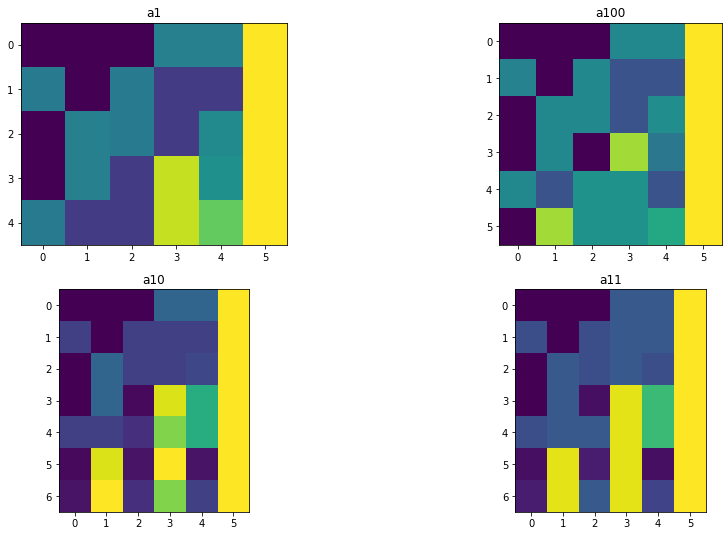

In [5]:
# plot images at a label

plot_imshow_samples("a")

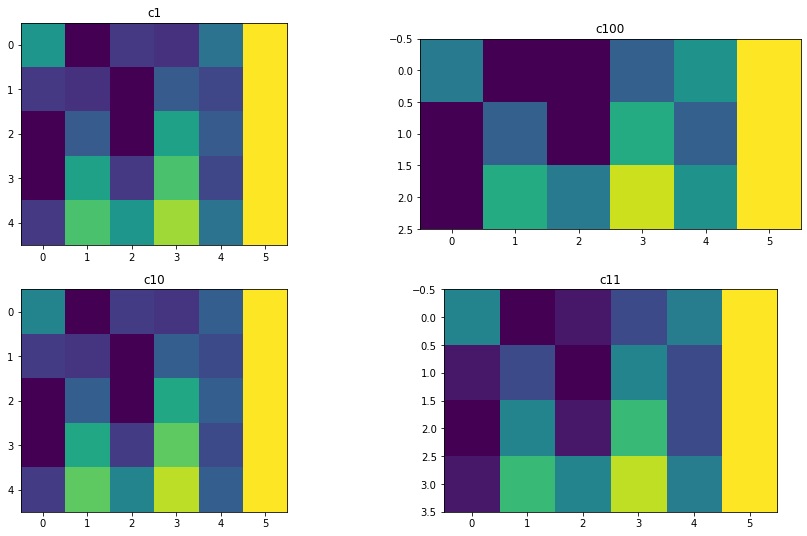

In [6]:
# plot images at c label

plot_imshow_samples("c")

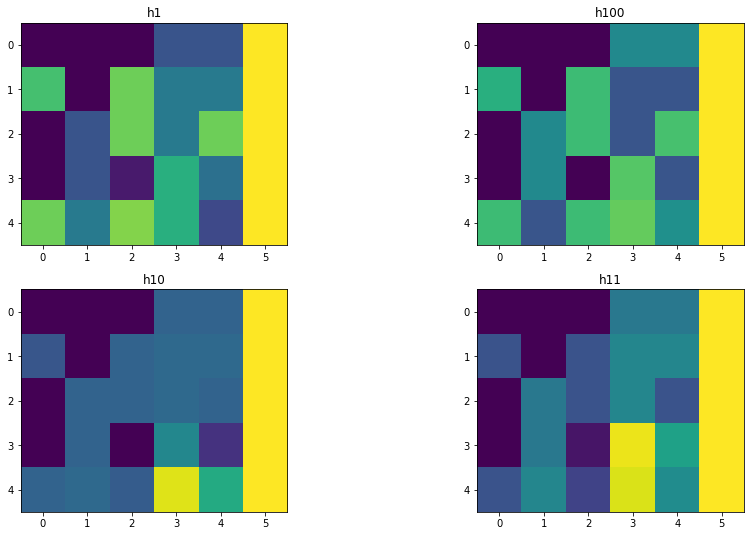

In [7]:
# plot images at h label

plot_imshow_samples("h")

## Distribution

In [8]:
# This function to show distribution of each image from certain label

def plot_distim_samples(label=None):
    if label == None:
        return
    
    fig, ax = plt.subplots(figsize=(15, 9), nrows=2, ncols=2)
    index = images_train[images_train["Label"] == label].index
    
    for i in range(2):
        pixels = []
        image = images_train.iloc[index[i]]["Image"]
        label = images_train.iloc[index[i]]["Label"]
        number = images_train.iloc[index[i]]["Number"]
        for row in image:
            for column in row:
                pixels.append(column)
        
        sns.distplot(x=pixels, ax=ax[i][0])
        ax[i][0].set_title(label + number)
        
    for i in range(2):
        pixels = []
        image = images_train.iloc[index[2+i]]["Image"]
        label = images_train.iloc[index[2+i]]["Label"]
        number = images_train.iloc[index[2+i]]["Number"]
        for row in image:
            for column in row:
                pixels.append(column)
        
        sns.distplot(x=pixels, ax=ax[i][1])
        ax[i][1].set_title(label + number)

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

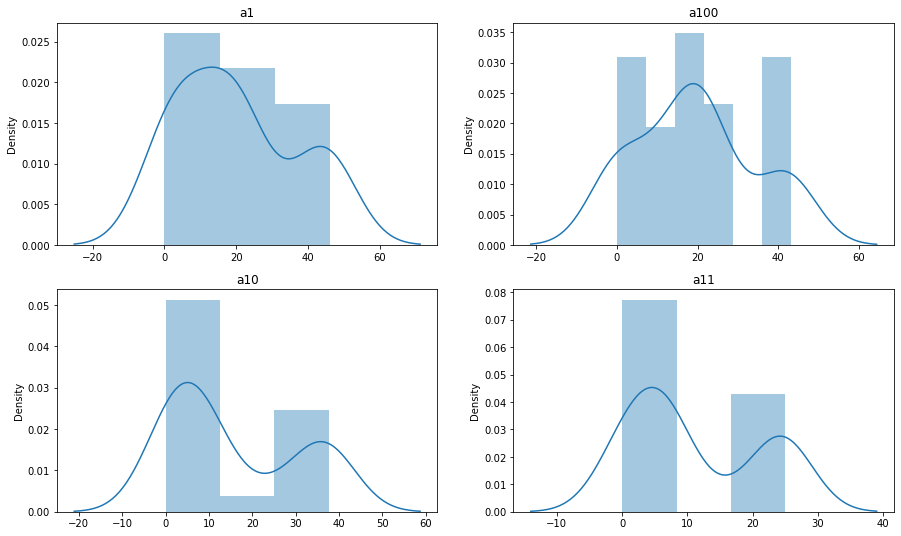

In [9]:
plot_distim_samples("a")

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

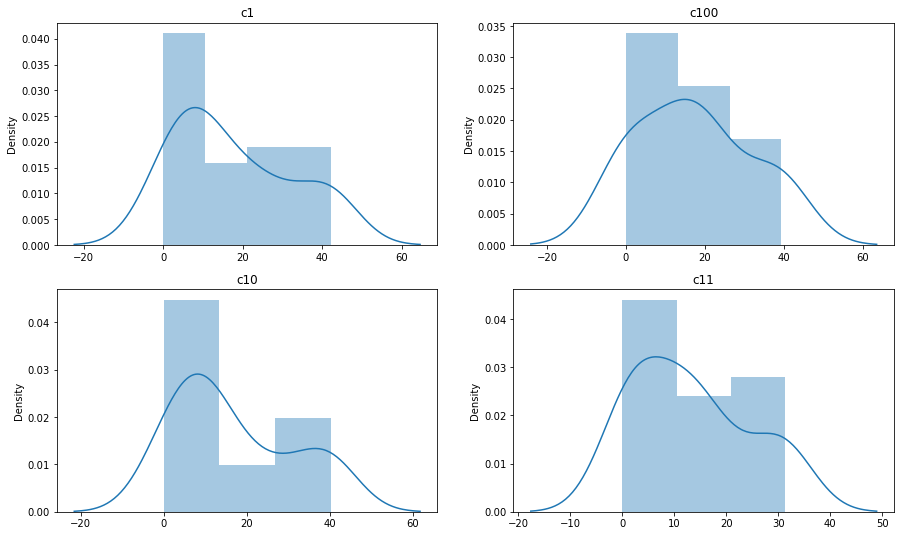

In [10]:
plot_distim_samples("c")

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

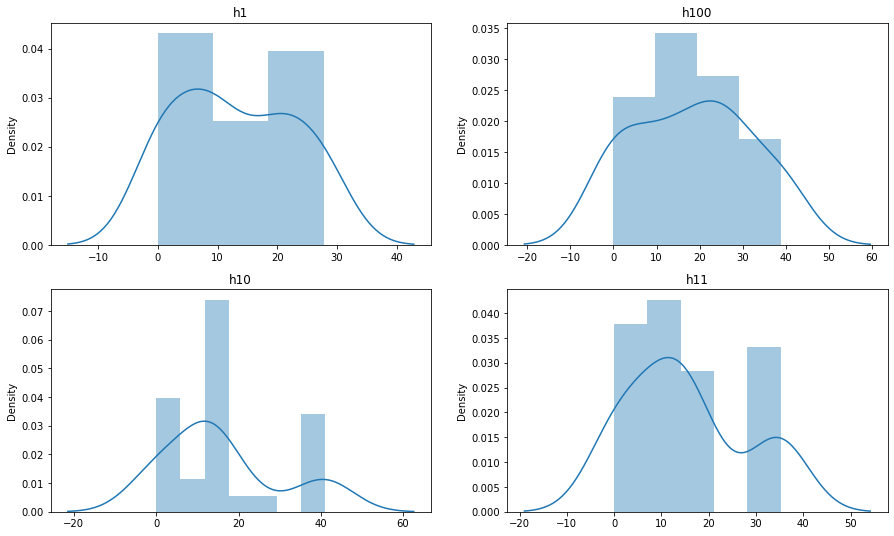

In [11]:
plot_distim_samples("h")

In [12]:
# This function to show distribution images from certain label

def plot_distim(label=None, axes=None):
    if label == None:
        return
    
    pixels = []
    indexes = images_train[images_train["Label"] == label].index
    for index in indexes:
        image = images_train.iloc[index]["Image"]
        for row in image:
            for column in row:
                pixels.append(column)
    
    if axes != None:
        try:
            sns.distplot(x=pixels, ax=axes)
            axes.set_title(f"Plot distribution of '{label}' label")
        except:
            pass
    else:
        fig, ax = plt.subplots(figsize=(15, 9))
        
        sns.distplot(x=pixels)
        plt.title(f"Plot distribution of '{label}' label")
        return plt.show()

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

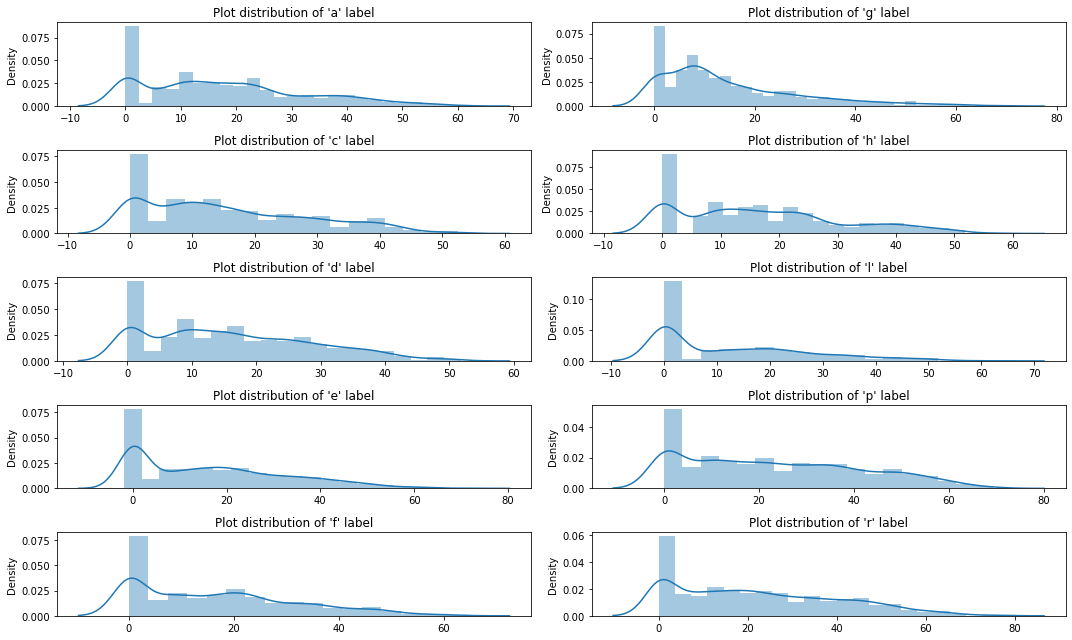

In [13]:
labels = images_train["Label"].unique()

fig, ax = plt.subplots(figsize=(15,9), nrows=5, ncols=2)

for i in range(5):
    plot_distim(labels[i], axes=ax[i][0])
    plot_distim(labels[5+i], axes=ax[i][1])
    fig.tight_layout()